###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, I. Hawke. Partly based on content by David Ketcheson, also under CC-BY.

# Full phugoid model

This is the third Jupyter Notebook of the series on the _phugoid model of glider flight_, our first learning module of the course ["Practical Numerical Methods with Python"](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about). In the [first notebook](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_01_Phugoid_Theory.ipynb), we described the physics of the trajectories known as phugoids obtained from an exchange of potential and kinetic energy in an idealized motion with no drag. We gave you a neat little code to play with and plot various phugoid curves.

In the second notebook, we looked at the equation representing small perturbations on the straight-line phugoid, resulting in simple harmonic motion. This is a second-order ordinary differential equation, and we solved it numerically using **Euler's method**: the simplest numerical method of all. We learned about convergence and calculated the error of the numerical solution, comparing with an analytical solution. That is a good foundation!

Now, let's go back to the dynamical model, and take away the idealization of no-drag. Let's remind ourselves of the forces affecting an aircraft, considering now that it may be accelerating, with an instantaneous upward trajectory. We use the designation $\theta$ for the angle, and consider it positive upwards.

![Image](./figures/glider_forces-lesson3.png)
#### Figure 1. Forces with a positive trajectory angle.

In Figure 1, $L$ is the lift, $W$ is the weight, $D$ is the drag, and $\theta$ the positive angle of the trajectory, instantaneously. 

In [Lesson 1](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_01_Phugoid_Theory.ipynb), we wrote the force balance in the directions perpendicular and parallel to the trajectory for a glider in _equilibrium_. What if the forces are _not_ in balance? Well, there will be acceleration terms in the equations of motion, and we would have in that case:

$$
\begin{align}
m \frac{dv}{dt} & = - W \sin\theta - D \\
m v \, \frac{d\theta}{dt} & = - W \cos\theta + L
\end{align}
$$

We can use a few little tricks to make these equations more pleasing. First, use primes to denote the time derivatives and divide through by the weight:

$$
\begin{align}
 \frac{v'}{g} & = - \sin\theta - D/W \\
\frac{v}{g} \, \theta' & = - \cos\theta + L/W
\end{align}
$$

Recall, from our first lesson, that the ratio of lift to weight is known from the trim conditions—$L/W=v^2/v_t^2$— and also from the definitions of lift and drag, 

$$
\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}
$$

we see that $L/D=C_L/C_D$. The system of equations can be re-written:

$$
\begin{align}
v' & = - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\
\theta' & = - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v
\end{align}
$$

It is very interesting that the first equation has the factor $C_D/C_L$, which is the inverse of a measure of the aerodynamic efficiency of the aircraft. It turns out, this is the term that contributes damping to the phugoid model: if drag is zero, there is no damping. Drag is never zero in real life, but as engineers design more aerodynamically efficient aircraft, they make the phugoid mode more weakly damped. At altitude, this is nothing but a slight bother, but vertical oscillations are unsafe during final approach to land, so this is something to watch out for!


## The initial value problem

If we want to visualize the flight trajectories predicted by this model, we are going to need to integrate the spatial coordinates, which depend on both the forward velocity (tangential to the trajectory) and the trajectory angle. The position of the glider on a vertical plane will be designated by coordinates $(x, y)$ with respect to an inertial frame of reference, and are obtained from:

$$
\begin{align}
x'(t) & = v \cos(\theta) \\
y'(t) & = v \sin(\theta)
\end{align}
$$

Augmenting our original two differential equations by the two equations above, we have a system of four first-order differential equations to solve. We will use a time-stepping approach, like in the previous lesson. To do so, we do need *initial values* for every unknown:

$$
v(0) = v_0 \quad \text{and} \quad \theta(0) = \theta_0 \\
x(0) = x_0 \quad \text{and} \quad y(0) = y_0
$$

## Solve with Euler's method

We know how to apply Euler's method from the previous lesson. We replace each of the time derivatives by an approximation of the form:

$$
v'(t) \approx \frac{v^{n+1} - v^n}{\Delta t}
$$

where we are now using a superscript $n$ to indicate the $n$-th value in the time iterations. The first differential equation, for example, gives:

$$
\frac{v^{n+1} - v^n}{\Delta t} = - g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2
$$

Alright, we know where this is going. At each time iteration $t^n$, we want to evaluate all the known data of our system to obtain the state at $t^{n+1}$—the next time step. We say that we are _stepping in time_ or _time marching_.

The full system of equations discretized with Euler's method is:

$$
\begin{align}
v^{n+1} & = v^n + \Delta t \left(- g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2 \right) \\
\theta^{n+1} & = \theta^n + \Delta t \left(- \frac{g}{v^n}\,\cos\theta^n + \frac{g}{v_t^2}\, v^n \right) \\
x^{n+1} & = x^n + \Delta t \, v^n \cos\theta^n \\
y^{n+1} & = y^n + \Delta t \, v^n \sin\theta^n.
\end{align}
$$

As we've learned before, the system of differential equations can also be written as a vector equation:

$$
u'(t) = f(u)
$$

where

$$
\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix}
\end{align}
$$

It's a bit tricky to code the solution using a NumPy array holding all your independent variables. But if you do, a function for the Euler step can be written that takes any number of simultaneous equations. It simply steps in time using the same line of code:

```Python
def euler_step(u, f, dt):
    return u + dt * f(u)
```

This function can take a NumPy array `u` with any number of components. All we need to do is create an appropriate function `f(u)` describing our system of differential equations. Notice how we are passing a _function_ as part of the arguments list to `euler_step()`. Neat!

### And solve!

As always, we start by loading the modules and libraries that we need for this problem. We'll need a few transcendental functions, including the $\log$ for a convergence study later on. And remember: the line `%matplotlib inline` is a magic function that tells Matplotlib to give us the plots in the notebook (the default behavior of Matplotlib is to open a pop-up window).

In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In addition, we modify some entries of the `rcParams` dictionary of `pyplot` to define notebook-wide plotting parameters: font family and font size.
Here we go!

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

Next, we need to set things up to start our numerical solution: the parameter 
values and the _initial values_. You know what the acceleration of gravity is: 9.81 m/s$^2$, but what are good values for $C_D/C_L$, the inverse of the aerodynamic efficiency? Some possible values are given on a table in the Wikipedia entry for [lift-to-drag ratio](http://en.wikipedia.org/wiki/Lift-to-drag_ratio): a modern sailplane can have $L/D$ of 40 to 60, depending on span (and, in case you're interested, a flying squirrel has $L/D$ close to 2).

For the _trim velocity_, the speed range for typical sailplanes is between 65 and 280 km/hr, according to Wikipedia (it must be right!). Let's convert that to meters per second: 18 to 78 m/s. We'll pick a value somewhere in the middle of this range.

Here's a possible set of parameters for the simulation, but be sure to come back and change some of these, and see what happens!

In [3]:
# Set parameters.
g = 9.81  # gravitational acceleration (m.s^{-2})
vt = 30.0  # trim velocity (m.s)
CD = 1.0 / 40  # drag coefficient
CL = 1.0  # lift coefficient

# Set initial conditions.
v0 = vt  # start at the trim velocity
theta0 = 0.0  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 1000.0  # vertical position (altitude)

We'll define a function `rhs_phugoid()` to match the right-hand side of Equation (15), the full differential system in vector form. This function assumes that we have available the parameters defined above. If you re-execute the cell above with different parameter values, you can just run the solution without re-executing the function definition.

In [4]:
def rhs_phugoid(u, CL, CD, g, vt):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time step
        as a list or 1D array of four floats.
    CL : float
        Lift coefficient.
    CD : float
        Drag coefficient.
    g : float
        Gravitational acceleration.
    vt : float
        Trim velocity.
    
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

Compare the code defining function `rhs_phugoid()` with the differential equations, and convince yourself that it's right!

$$
\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix} \nonumber
\end{align}
$$

Now, Euler's method is implemented in a simple function `euler_step()`:

In [5]:
def euler_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using Euler's method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_new = u + dt * f(u, *args)
    return u_new

**Note**—We use an optional input to the function `euler_step()`, named `*args`. It passes to the function `f()` an arbitrary number of arguments. Doing so, `euler_step()` can take any function `f()`, regardless of the number of arguments this function needs. Sweet! (Read the Python documentation about [Arbitrary Argument Lists](https://docs.python.org/3/tutorial/controlflow.html#arbitrary-argument-lists) for more explanations.)

After defining a final time for the solution, and the time step $\Delta t$, we can construct the grid in time using the NumPy function [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Make sure you study the decisions we made here to build the time grid: why do we add 1 to the definition of `N`, for example?

Look at the code below, and make sure you understand the following aspects of it.

* The NumPy array `u` contains the solution at every time-step,  consisting of the velocity, angle and location of the glider. 
* The first element of the array `u` is set to contain the initial conditions. 
* In the `for`-loop, the function `euler_step()` is called to get the solution at time-step $n+1$.  

In [6]:
T = 100.0  # length of the time interval
dt = 0.1  # time-step size
N = int(T / dt) + 1  # number of time steps

# Create array to store the solution at each time step.
u = numpy.empty((N, 4))
# Set the initial conditions.
u[0] = numpy.array([v0, theta0, x0, y0])

# Time integration with Euler's method.
for n in range(N - 1):
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

## Plot the trajectory

In order to plot the path of the glider, we need the location (`x`, `y`) with respect to time. That information is already contained in our NumPy array containing the solution; we just need to pluck it out. 

Make sure you understand the indices to `u`, below, and the use of the colon notation. If any of it is confusing, read the Python documentation on [Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

In [7]:
# Get the glider's position over the time.
x = u[:, 2]
y = u[:, 3]

Time to plot the path of the glider and get the distance travelled!

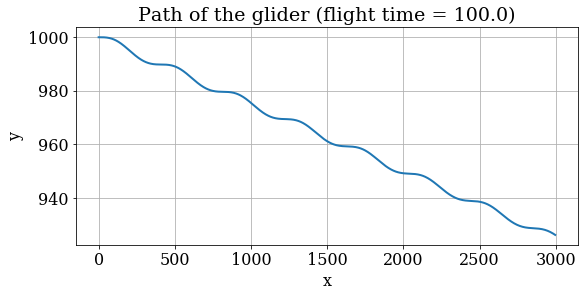

In [8]:
# Plot the path of the glider.
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);

## Grid convergence

Let's study the convergence of Euler's method for the phugoid model. In the previous lesson, when we studied the straight-line phugoid under a small perturbation, we looked at convergence by comparing the numerical solution with the exact solution. Unfortunately, most problems don't have an exact solution (that's why we compute in the first place!). But here's a neat thing: we can use numerical solutions computed on different grids to study the convergence of the method, even without an analytical solution.

We need to be careful, though, and make sure that the fine-grid solution is resolving all of the features in the mathematical model. How can we know this? We'll have a look at that in a bit. Let's see how this works first.

You need a sequence of numerical solutions of the same problem, each with a different number of time grid points.

Let's create a list of floats called `dt_values` that contains the time-step size of each grid to be solved on. For each element of `dt_values`, we will compute the solution `u` of the glider model using Euler's method and add it to the list `u_values` (initially empty).
If we want to use five different values of $\Delta t$, we'll have five elements in the list `u_values`, each element being a Numpy array. We'll have a list of Numpy arrays! How meta is that?

Read the code below carefully, and remember: you can get a help panel on any function by entering a question mark followed by the function name. For example, add a new code cell below and type:  `?numpy.empty`.

In [9]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# Create an empty list that will contain the solution of each grid.
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    # Create array to store the solution at each time step.
    u = numpy.empty((N, 4))
    # Set the initial conditions.
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Temporal integration using Euler's method.
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution for the present time-step size
    u_values.append(u)

In [Lesson 2](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb), we compared our numerical result to an analytical solution, but now we will instead compare numerical results from different grids. 

For each solution, we'll compute the difference relative to the finest grid. You will be tempted to call this an _"error"_, but be careful: the solution at the finest grid is _not the exact_ solution, it is just a reference value that we can use to estimate grid convergence.

To calculate the difference between one solution `u_current` and the solution at the finest grid, `u_finest`, we'll use the $L_1$-norm, but any norm will do.

There is a small problem with this, though.  The coarsest grid, where $\Delta t = 0.1$, has 1001 grid points, while the finest grid, with $\Delta t = 0.001$ has 100001 grid points.  How do we know which grid points correspond to the same location in two numerical solutions, in order to compare them?  

If we had time grids of 10 and 100 steps, respectively, this would be relatively simple to calculate.  Each element in our 10-step grid would span ten elements in our 100-step grid. 

Calculating the _ratio_ of the two grid sizes will tell us how many elements in our fine-grid will span over one element in our coarser grid.

Recall that we can _slice_ a NumPy array and grab a subset of values from it.  The syntax for that is

```Python
my_array[3:8]
```

An additional slicing trick that we can take advantage of is the "slice step size."  We add an additional `:` to the slice range and then specify how many steps to take between elements. For example, this code

```Python
my_array[3:8:2]
```

will return the values of `my_array[3]`, `my_array[5]` and `my_array[7]`

With that, we can write a function to obtain the differences between coarser and finest grids. Here we go ...

In [10]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as an array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as an array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solutions in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

Now that the function has been defined, let's compute the grid differences for each solution, relative to the fine-grid solution. Call the function `l1_diff()` with two solutions, one of which is always the one at the finest grid. Here's a neat Python trick: you can use negative indexing in Python!  If you have an array called `my_array` you access the _first_ element with

`my_array[0]`

But you can also access the _last_ element with 

`my_array[-1]`

and the next to last element with

`my_array[-2]`

and so on.  

In [11]:
# Create an empty list to store the difference in the solution
# between two consecutive grids.
diff_values = []

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

Time to create a plot of the results! We'll create a *log-log* plot with the Matplotlib function [`loglog()`](https://matplotlib.org/api/pyplot_api.html?highlight=loglog#matplotlib.pyplot.loglog). Remember to skip the difference of the finest-grid solution with itself, which is zero.

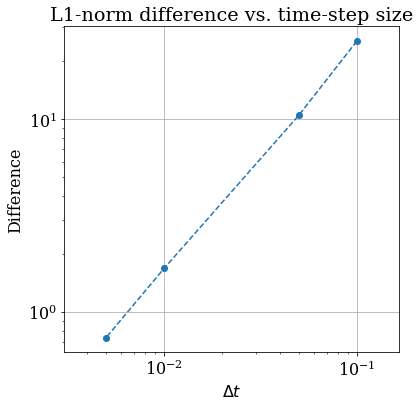

In [12]:
# Plot the difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

### Order of convergence

The order of convergence is the rate at which the numerical solution approaches the exact one as the mesh is refined. Considering that we're not comparing with an exact solution, we use 3 grid resolutions that are refined at a constant ratio $r$ to find the *observed order of convergence* ($p$), which is given by:

$$
\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}
$$

where $f_1$ is the finest mesh solution, and $f_3$ the coarsest.  

In [13]:
r = 2  # refinement ratio for the time-step size
h = 0.001  # base grid size

dt_values2 = [h, r * h, r**2 * h]
u_values2 = []

for dt in dt_values2:
    N = int(T / dt) + 1  # number of time steps
    # Create array to store the solution at each time step.
    u = numpy.empty((N, 4))
    # Set initial conditions.
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Time integration using Euler's method.
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution.
    u_values2.append(u)

# Calculate f2 - f1.
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
# Calculate f3 - f2.
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
# Calculate the observed order of convergence.
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.014


See how the observed order of convergence is close to 1? This means that the rate at which the grid differences decrease match the mesh-refinement ratio. We say that Euler's method is of *first order*, and this result is a consequence of that.

# Paper airplane challenge

Suppose you wanted to participate in a paper-airplane competition, and you want to use what you know about the phugoid model to improve your chances. For a given value of $L/D$ that you can obtain in your design, you want to know what is the best initial velocity and launch angle to fly the longest distance from a given height.

Using the phugoid model, write a new code to analyze the flight of a paper airplane, with the following conditions:

*  Assume $L/D$ of 5.0 (a value close to measurements in Feng et al. 2009)
*  For the trim velocity, let's take an average value of 4.9 m/s.
*  Find a combination of launch angle and velocity that gives the best distance.
*  Think about how you will know when the flight needs to stop ... this will influence how you organize the code.
*  How can you check if your answer is realistic?

## References

* Feng, N. B. et al. _"On the aerodynamics of paper airplanes"_, AIAA paper 2009-3958, 27th AIAA Applied Aerodynamics Conference, San Antonio, TX. [PDF](http://arc.aiaa.org/doi/abs/10.2514/6.2009-3958)

* Simanca, S. R. and Sutherland, S. _"Mathematical problem-solving with computers,"_ 2002 course notes, Stony Brook University, chapter 3: [The Art of Phugoid](https://www.math.sunysb.edu/~scott/Book331/Art_Phugoid.html). (Note that there is an error in the figure: sine and cosine are switched.)

---

###### The cell below loads the style of the notebook.

In [14]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())